# Global libraries

In [1]:
############################################# import libraries ###############################
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import (LinearSegmentedColormap,ListedColormap)
import matplotlib.ticker as mtick
from matplotlib.patches import Ellipse
from matplotlib.text import OffsetFrom
from matplotlib.lines import Line2D
import matplotlib.image as mpimg
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator,LogLocator)
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from matplotlib.collections import LineCollection
from matplotlib import cm

############################################ 
import pandas as pd
import glob
import os
from os import listdir
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import math
from mpl_toolkits.mplot3d import Axes3D
import numpy.polynomial.polynomial as poly

########################################### for image composition
import svgutils.compose as sc
from IPython.display import SVG
import matplotlib.image as imgs 
from PIL import Image 

### scypy libraries
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy import optimize
from scipy.interpolate import *
from scipy.signal import savgol_filter
from scipy import integrate
import scipy.interpolate as si
# from scipy.interpolate import BSpline
import scipy.interpolate as interpolate

### lmfit libraries, used for curve and peak fitting 
import lmfit 
import asteval
from lmfit import *
from lmfit import models
from lmfit.model import load_model
from lmfit.model import save_modelresult
from lmfit.models import (ExpressionModel, GaussianModel, ExponentialModel,PowerLawModel,
                          StepModel,LinearModel) 

# -------------------------------- other libraries
from brukeropusreader import read_file  #opus_data = read_file('opus_file.0')
import ntpath
import argparse
import sys
import statsmodels.api as sm
from patsy import dmatrices
from BaselineRemoval import BaselineRemoval

from matplotlib.patheffects import Stroke, Normal


# --------------------------------    plotting style -----------------------

plt.style.use('seaborn-paper')
plt.rc('font', family='serif')
#plt.rcParams['figure.dpi']= 150

nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 8.2,
        "font.size": 8.2,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 8,
        "xtick.labelsize": 7.8,
        "ytick.labelsize": 7.8,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'ytick.minor.left': True,
        'xtick.minor.bottom': True,
        'ytick.direction': 'in',
        'xtick.direction': 'in',
}
plt.rcParams.update(nice_fonts)

# plt.rc('xtick', labelsize='x-small')
# plt.rc('ytick', labelsize='x-small')

In [2]:
def plot_absorbance_1(data, labels):
    # figure frame and subplots
    fig = plt.figure(figsize=(5, 1.8))
    ax = fig.add_subplot(1, 1, 1,)
    # Plot the bars
    ax.plot(data, lw=1, ls='-')
    ax.set_ylim(0, 1)
    ax.set_xlim(385,2500)
    # Apply labels to the bars so you know which is which
    ax.legend(labels=labels, loc='upper right', bbox_to_anchor=(1, 1))

    ax.set_xlabel("Wavelength [nm]")
    ax.set_ylabel("Absorbance")
    ax.set_xlim(385, 1110)
    ax.set_ylim(0, 0.9)
    ax.xaxis.set_minor_locator(MultipleLocator(125))
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    return fig, ax

In [3]:
def plot_absorbance_2(data,labels):
    # Create the figure and axis objects I'll be plotting on fig, ax = plt.subplots()
    fig = plt.figure(figsize=(5,1.8))
    ax = fig.add_subplot(1, 1, 1,)# 
    # Plot the bars
    ax.plot(data, lw=1, ls='-')

    # Set a reasonable y-axis limit
    ax.set_ylim(0, 1)
    ax.set_xlim(385,2500)
    
    # Apply labels to the bars so you know which is which
    ax.legend(labels=labels,loc='upper right',bbox_to_anchor=(1, 1))
    ax.set_xlabel("Wavelength [nm]")
    ax.set_ylabel("Absorbance")
    ax.set_xlim(385,2500)
    ax.set_ylim(0,0.9);
    ax.xaxis.set_minor_locator(MultipleLocator(125))
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    return fig, ax

In [2]:
zt_abundance = pd.read_csv("Chapter_1/zt_abundance1.csv",index_col=None, header=0)
zt_abundance.head(20)


,Temperature [K],Material,ZT,Major consitituing element,Abundance [kg/kg],Material family,Abundance [ppm]
0,305.764613,MnSi,0.14,Mn,9.500000e-04,Silicide,200000.000
1,363.944746,MnSi,0.19,Mn,9.500000e-04,Silicide,200000.000
2,307.205303,BaAuGe,0.19,Ge,1.500000e-06,Clathrates,1.500
3,356.882214,BaAuGe,0.25,Ge,1.500000e-06,Clathrates,1.500
4,406.562833,BaAuGe,0.33,Ge,1.500000e-06,Clathrates,1.500
5,459.000000,BaAuGe,0.40,Ge,1.500000e-06,Clathrates,1.500
6,301.635378,DD-FeCoSbSn,0.41,Sb,2.000000e-07,Skutterudites,0.200
7,335.713160,DD-FeCoSbSn,0.48,Sb,2.000000e-07,Skutterudites,0.200
8,389.667640,DD-FeCoSbSn,0.60,Sb,2.000000e-07,Skutterudites,0.200
9,414.000000,DD-FeCoSbSn,0.68,Sb,2.000000e-07,Skutterudites,0.200


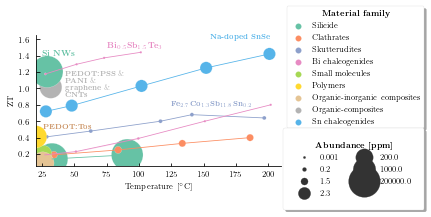

In [2]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
#data import
zt_abundance = pd.read_csv("Chapter_1/zt_abundance1.csv",index_col=None, header=0)
# setting the whole figure dimensions
fig = plt.figure(figsize=(4.4,2.4),)

# setting up a subplot within the figure (rows,columns,position)
ax1 = fig.add_subplot(1, 1, 1,) # yticklabels=[], yticks=[],xticklabels=[], xticks=[]) 

size=zt_abundance['Abundance [ppm]']

extra=sns.color_palette("colorblind",12)
husl=sns.color_palette("Set2", 9)


sns.scatterplot(data=zt_abundance,x=zt_abundance['Temperature [K]']-273, y='ZT',hue='Material family', marker='o',ax=ax1,
                  size=size,sizes=[5,15,50,150,300, 500,1000],legend=True,
                  palette=[husl[0],husl[1],husl[2],husl[3],husl[4],husl[5],husl[6],husl[7],extra[9]]
                 )


sns.lineplot(data=zt_abundance,x=zt_abundance['Temperature [K]']-273, y='ZT',hue='Material',ax=ax1,legend=False,zorder=1,lw=0.8,
             #palette='husl'
            palette=[husl[0],husl[1],husl[2],husl[3],husl[4],husl[5],husl[6],husl[7],husl[8],husl[3],extra[9],]

            )


# limits, labels, ...
for axes in [ax1.axes]:
    axes.set_xlim(290,490)
    axes.set_xlim(20,210)
#     axes.set_yscale('log')
    axes.set_ylim(0.06,1.65)
#     axes.set_yticks([1E-1,0.01,0.1,1.5])
    axes.set_xlabel('Temperature [$^\circ$C]')
# ax1.set_yticks([1E-1,0.2,1.5])

    
# ax1.legend(loc='upper right',bbox_to_anchor=(1.7,1.15),ncol=1, fontsize=7,labelspacing=0.5)
# ax1.legend(loc='upper left',bbox_to_anchor=(-0.7,1.15),ncol=1, fontsize=7,labelspacing=0.5)

#### annotations
# ax1.annotate('Bi$_{0.5}$Sb$_{1.5}$Te$_3$',
#             xy=(50, 1.5), xycoords="data", fontsize=7, color= husl[3], zorder=1)

text = ax1.text(75,1.5, '\\textbf{Bi$_{0.5}$Sb$_{1.5}$Te$_3$}',
          fontsize=8, color= husl[3], zorder=1,  transform=ax1.transData)
# text.set_path_effects([Stroke(linewidth=0.2, foreground="black"), Normal()])

text = ax1.text(25,1.4, '\\textbf{Si NWs}',
          fontsize=8, color= husl[0], zorder=1,  transform=ax1.transData)
# text.set_path_effects([Stroke(linewidth=0.2, foreground="black"), Normal()])

text = ax1.text(43,0.9, '\\textbf{PEDOT:PSS} \& \n \\textbf{PANI} \& \n \\textbf{graphene} \& \n \\textbf{CNTs}',
          fontsize=7, color= husl[7], zorder=1,  transform=ax1.transData)
# text.set_path_effects([Stroke(linewidth=0.2, foreground="black"), Normal()])

text = ax1.text(155,1.6, '\\textbf{Na-doped SnSe}',
          fontsize=7, color= extra[9], zorder=1,  transform=ax1.transData)
# text.set_path_effects([Stroke(linewidth=0.2, foreground="black"), Normal()])

text = ax1.text(26,0.52, '\\textbf{PEDOT:Tos}',
          fontsize=7, color= extra[5], zorder=1,  transform=ax1.transData, )
# text.set_path_effects([Stroke(linewidth=0.2, foreground="black"), Normal()],)
text = ax1.text(125,0.8, '\\textbf{Fe$_{2.7}$Co$_{1.3}$Sb$_{11.8}$Sn$_{0.2}$}',
          fontsize=7, color= husl[2], zorder=1,  transform=ax1.transData, )


# EXTRACT CURRENT HANDLES AND LABELS
h,l = ax1.get_legend_handles_labels()

# # COLOR LEGEND (FIRST 30 ITEMS)
col_lgd = plt.legend(h[1:10], l[1:10], loc='upper right', 
                     bbox_to_anchor=(1.6,1.25), fancybox=True, shadow=True, ncol=1, title='\\textbf{Material family}')

# # SIZE LEGEND (LAST 5 ITEMS)
size_lgd = plt.legend(h[-7:], l[-7:], loc='lower right', borderpad=1.6,
                      bbox_to_anchor=(1.6,-0.37), fancybox=True, shadow=True, ncol=2, title='\\textbf{Abundance [ppm]}', handletextpad=1)

# # ADD FORMER (OVERWRITTEN BY LATTER)
plt.gca().add_artist(col_lgd)



#fig.savefig('/Users/Zapata/Dropbox/Apps/Overleaf/thesis_OZA (Version 28107)/classicthesis_on_work/gfx/chapter_1/zt_vs_temperaturex.pdf', bbox_inches='tight')

# fig.savefig('/Users/Zapata/Dropbox/Apps/Overleaf/thesis_OZA (Version 28107)/classicthesis_on_work/gfx/chapter_1/publications.pdf', bbox_inches='tight')
# fig.savefig('/Users/Zapata/Dropbox/Apps/Overleaf/thesis_OZA (Version 28107)/classicthesis_on_work/gfx/chapter_1/publications.svg', bbox_inches='tight')


# Chapter 1

## carnot limit

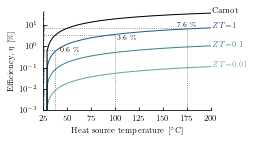

In [12]:
#data import
efficiency_frame = pd.read_csv("Chapter_1/Efficiency_frame.csv",index_col=0, header=0)
efficiency_frame = pd.read_csv("Chapter_1/Efficiency_frame.csv",index_col=0, header=0)
efficiency_melt=pd.melt(efficiency_frame, 
        id_vars=['Carnot'], #Column(s) to use as identifier variables.
        var_name='ZT', # Name to use for the ‘variable’ column. If None it uses frame.columns.name or ‘variable’.
        value_name='ZT_value', # Name to use for the ‘value’ column.
        ignore_index=False
       )
efficiency_melt=efficiency_melt.reset_index()

# setting the whole figure dimensions
fig = plt.figure(figsize=(3,1.8))

# setting up a subplot within the figure (rows,columns,position)
ax1 = fig.add_subplot(1, 1, 1, ) # yticklabels=[], yticks=[],xticklabels=[], xticks=[]) 


sns.lineplot(data=efficiency_melt, x='Temperature[C]',y='ZT_value', hue='ZT',lw=1 ,palette='crest',ls='-',zorder=0,ax=ax1,legend=False )
sns.lineplot(data=efficiency_melt, x='Temperature[C]',y='Carnot', lw=1 ,color='k',ls='-',zorder=0,ax=ax1 )

crest=sns.color_palette("crest", as_cmap=True)


ax1.annotate("$ZT$=0.01", xy=(1.01, 0.44), xycoords="axes fraction", fontsize=7.8,color=crest(0.2))
ax1.annotate("$ZT$=0.1", xy=(1.01, 0.65), xycoords="axes fraction", fontsize=7.8,color=crest(0.5))
ax1.annotate("$ZT$=1", xy=(1.01, 0.84), xycoords="axes fraction", fontsize=7.8,color=crest(0.95))
ax1.annotate("Carnot", xy=(1.01, 1), xycoords="axes fraction", fontsize=7.8,color='k')

ax1.vlines(100,1E-3,3.6E0,ls=':',lw=0.8,color='dimgray',zorder=-1)
ax1.hlines(3.6E0,0,100,ls=':',lw=0.8,color='dimgray',zorder=-1)

ax1.vlines(37,7E-4,6.7E-1,ls=':',lw=0.8,color='dimgray',zorder=-1)
ax1.hlines(6.5E-1,0,37,ls=':',lw=0.8,color='dimgray',zorder=-1)

ax1.vlines(175,7E-4,7.6E0,ls=':',lw=0.8,color='dimgray',zorder=-1)
ax1.hlines(7.6E0,0,175,ls=':',lw=0.8,color='dimgray',zorder=-1)


ax1.annotate("0.6 $\%$", xy=(42, 5E-1), xycoords="data", fontsize=7,color='k')
ax1.annotate("3.6 $\%$", xy=(102, 2E0), xycoords="data", fontsize=7,color='k')
ax1.annotate("7.6 $\%$", xy=(165, 8.2E0), xycoords="data", fontsize=7,color='k')


ax1.set_yscale('log')
ax1.set_ylim(1E-3,40)
ax1.set_xlim(25,200)
ax1.set_xlabel('Heat source temperature [$^\circ$C]')
ax1.set_ylabel('Efficiency, $\eta$ [$\%$]')




plt.subplots_adjust(
    wspace = 0.2,  # the amount of width reserved for space between subplots,
                  # expressed as a fraction of the average axis width
    hspace = 0.2  # the amount of height reserved for space between subplots,
)


# fig.savefig('/Users/Zapata/Dropbox/Apps/Overleaf/thesis_OZA (Version 28107)/
# classicthesis_on_work/gfx/chapter_1/efficiency_limit.pdf', bbox_inches='tight) 

 # Chapter 2 Experimental details

Text(400, 0.7, '\\textbf{$\\ominus$}')

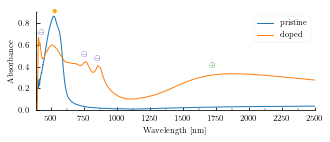

In [6]:
uv_vis = pd.read_csv("Chapter_2/UV_Vis_NIR/uvvis_c2_f5.csv",index_col=0, header=0) 
labels=['pristine', 'doped']
plot_absorbance_2(uv_vis,labels)
# annotations in plot –––––––––
plt.annotate("\\textbf{$\ominus$}", xy=(730, 0.5), xycoords="data", fontsize=8, color= 'navy', zorder=20)
plt.annotate("\\textbf{$\ominus$}", xy=(830, 0.46), xycoords="data", fontsize=8, color= 'navy', zorder=20)
plt.annotate("\\textbf{$\\bullet$}", xy=(510, 0.88), xycoords="data", fontsize=11, color= 'orange', zorder=20)
plt.annotate("\\textbf{$\oplus$}", xy=(1700, 0.4), xycoords="data", fontsize=8, color= 'green', zorder=20)
plt.annotate("\\textbf{$\ominus$}", xy=(400, 0.7), xycoords="data", fontsize=8, color= 'navy', zorder=20)
#plt.tight_layout()


**Figure 2_5** : UV-Vis-NIR absorbance spectrum for a film of PBTTT, in its pristine state (blue line), and doped with F4TCNQ (red line). Symbols in the plot indicate the characteristic bands of the F4TCNQ•–($\ominus$), the neutral polymer ($\bullet$), and the polaron ($\oplus$)

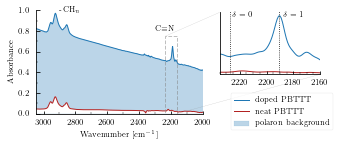

In [9]:
ftir_x = pd.read_csv("/Users/Zapata/Documents/OneDrive/python_projects/k_s/thesis_files/IR/ir_x.csv",index_col=None, header=0) 
fig = plt.figure(figsize=(3,1.9), constrained_layout=False)
ax = fig.add_subplot(1, 1, 1,)# yticklabels=[], yticks=[])

#####
ax.plot(ftir_x['wavenumber'],ftir_x['a'],color='tab:blue',lw=1, label='doped PBTTT')
ax.plot(ftir_x['wavenumber'],(ftir_x['j']),color='firebrick',lw=1, label='neat PBTTT')
#####
ax.fill_between(ftir_x['wavenumber'],ftir_x['a'], color= 'tab:blue',alpha=0.3,label='polaron background')
ax.fill_between(ftir_x['wavenumber'],ftir_x['j'], color= 'white',alpha=1,label='',zorder=1)

#####
axins = ax.inset_axes([1.1, 0.38, 0.6, 0.6], yticklabels=[], yticks=[])
axins.patch.set_alpha(0.1)
axins.plot(ftir_x['wavenumber'],(ftir_x['a']*3.4-1.5),color='tab:blue',lw=1, label='doped PBTTT',zorder=1)
axins.plot(ftir_x['wavenumber'],(ftir_x['j']),color='firebrick',lw=1, label='PBTTT',zorder=1)
axins.vlines([2190.5,2227], 0, 2, lw=0.8, ls=':', color='k')
#####
axins.set_xlim(2235,2160)
axins.set_ylim(0,0.75)
ax.indicate_inset_zoom(axins, lw=1,ls='--',label='')
#####
ax.annotate("-$\,$CH$_n$", xy=(2900, 0.98), xycoords="data", fontsize=7.5, color= 'k', zorder=1)
ax.annotate('C$\equiv$N', xy=(2300, 0.8), xycoords="data", fontsize=7.5, color= 'k', zorder=1)
axins.annotate('$\delta=1$', xy=(2188, 0.7), xycoords="data", fontsize=7.8, color= 'k', zorder=1)
axins.annotate('$\delta=0$', xy=(2226, 0.7), xycoords="data", fontsize=7.8, color= 'k', zorder=1)

#####
ax.legend(loc='lower right', prop={'size': 7.6},bbox_to_anchor=(1.8, -0.2))
#####
ax.set_xlabel("Wavenumber [cm$^{-1}$]",)
ax.set_ylabel("Absorbance",)
ax.set_xlim(3050,2000)
ax.set_ylim(0,1);

ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
axins.xaxis.set_minor_locator(MultipleLocator(5))


# fig.savefig('/Users/Zapata/Dropbox/Apps/Overleaf/thesis_OZA (Version 28107)/classicthesis_on_work/gfx/FTIR_ref.pdf', bbox_inches='tight')


In [2]:
def lineplot(data, x,y,hue):
    # Create the figure and axis objects I'll be plotting on fig, ax = plt.subplots()
    fig = plt.figure(figsize=(5,1.8))
    ax = fig.add_subplot(1, 1, 1,)# 
    return plt.gcf(), axes

In [141]:
def set_labels(fig, axes, position):
            #axes.set_xlabel(xlabels[i])
            axes.legend(bbox_to_anchor=(position))

In [9]:
def lineplot(data, x, y, hue):
    # Create the figure and axis objects I'll be plotting on fig, ax = plt.subplots()
    fig = plt.figure(figsize=(5,1.8))
    ax = fig.add_subplot(1, 1, 1,)# 
    sns.lineplot(data=data, x=x,y=y,hue=hue, lw=1,ls='-', ax=ax)
    return plt.gcf(), axes
# axes.set_xlim(1000,2000)